# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2 - Алгоритмы кластеризации


###### <hr\>
**Общая информация**

**Срок сдачи:** 23 октября 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 23 октября, -4 балла после 06:00 30 октября, -6 баллов после 06:00 6 ноября

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

###### Задание 1 (4 балла)
Реализовать алгоритм кластеризации, который относится к вашему варианту. Проверить работоспособность алгоритма на "Iris". Сравните свой алгоритм кластеризации с алгоритмом из scikit-learn по времени выполнения, использую timeit. Ваша реализация не должна работать сильно дольше, а в идеале должна быть даже немного быстрее.

###### Задание 2 (2 балла)
Выбрать, имплементировать и использовать критерий качества

###### Задание 3 (3балла)
Применить алгоритм кластеризации к данным по странам.   
Подход следующий: фиксируем год, для каждой страны берём индикаторы по зафиксированному году, кластеризуем по индикаторам.   
Разбиение должно быть объяснимым, в противном случае, скорее всего нужно лучше настроить параметры кластеризации.   
Данные нужно скачать тут https://data.worldbank.org/data-catalog/world-development-indicators.   
Также необходимо показать, какие страны попали в общий кластер.
изуализировать результат с помощью T-SNE. Внимание! На полном объеме данных данный алгоритм может работать существенное время.

###### Задание 4 (1 балл)
Опишите в выводе почему и какие страны попали в общий кластер.

Основная задача этого задания - реализация одного из алгоритмов кластеризации. Кроме того, мы научимся подбирать параметры алгоритма, визуализируем результат кластеризации и попытаемся проанализировать природу полученных кластеров.

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.spatial as ss
import sklearn.cluster as sc
import sklearn.manifold as sm
import sklearn.datasets as ds
import sklearn.metrics as smt
from numba import jit

import matplotlib.pyplot as plt
import mpl_toolkits.basemap as bm

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

# Plotting config
%pylab inline
%load_ext Cython

Populating the interactive namespace from numpy and matplotlib


## Реализация алгоритма

Алгоритм кластеризации, который необходимо реализовать, выбирается на основании Вашего порядкового номера в списке группы.

1. Авилова Екатерина
2. Адаменко Павел
3. Акиньщиков Алексей
4. Афанасьева Анастасия
5. Балес Александр
6. Беляев Владимир
7. Беспалова Анастасия
8. Богомолов Эмиль
9. Боднарюк Василий
10. Бучкин Александр
11. Валинуров Денис
12. Волков Глеб
13. Голенков Кирилл
14. Горбушин Михаил
15. Димов Илья
16. Докшина Елизавета
17. Дорожинский Владислав
18. Жирнов Михаил
19. Жолковский Евгений
20. Зайдель Петр
21. Зимнюков Максим
22. Иванов Илья
23. Кашипов Артем
24. Комов Евгений
25. Кошман Дима
26. Кузнецова Екатерина
27. Кулагин Алексей
28. Лавреновъ Виталiй
29. Лебедь Федор
30. Лешков Михаил
31. Лозинский Иван
32. Лоскутов Антон
33. Лютов Владимир
34. Мажаров Иван
35. Манкевич Павел
36. Муравьев Никита
37. Находнов Максим
38. Оплачко Николай
39. Павлов Евгений
40. Петряйкин Федор
41. Рахматуллин Фарид
42. Секретарев Тихон
43. Сенюшкин Дмитрий
44. Серов Николай
45. Смирнов Александр
46. Соловьев Павел
47. Сомов Иван
48. Спиркин Роман
49. Терёшина Мария
50. Торбунова Екатерина
51. Тюгаев Антон
52. Фельдман Борис
53. Филин Максим
54. Фролов Михаил
55. Хохлов Олег
56. Черемнов Андрей
57. Шевцов Антон
58. Шурыгин Александр

In [2]:
N = 28 # put your index here

In [3]:
algorithms = [
    u"Gaussian Mixture Model с использованием maximum a-posteriori для выбора кластера (параметр - k)",
    u"Hierarchical clustering с поддержкой single-linkage, complete-linkage, average-linkage (параметры - k, linkage)",
    u"DBSCAN. (параметры - epsilon, min_pts)"
]

my_algorithm = algorithms[N % len(algorithms)]
print u"Реализуем алгоритм кластеризации '%s'" % my_algorithm

Реализуем алгоритм кластеризации 'Hierarchical clustering с поддержкой single-linkage, complete-linkage, average-linkage (параметры - k, linkage)'


Алгоритм кластеризации должен удовлетворять следующему интерфейсу. Конструктор принимает набор параметров, необходимых для работы алгоритма кластеризации. Метод `fit` подсчитывает параметры модели и возвращает `self`. Метод `predict` возвращает вектор с индексами кластеров для поданных в него объектов `x`

In [44]:
from sklearn.base import BaseEstimator, ClusterMixin
import scipy.spatial.distance as cd

class HyrarhialClustering(BaseEstimator, ClusterMixin):
    """
    Implement clustering algorithm according 
    """
    
    def __init__(self, n_clusters=3, linkage='single', metric='euclidean'):
        """
        Please add necessary algoritm parameters to class constructor.
        """
        self.n_clusters = n_clusters
        if linkage == 'single' or linkage == 'complete' or linkage == 'average':
            self.linkage = linkage
        else:
            raise 'wrong linkage'
        self.metric = metric
        return
  
    def fit(self, X, y=None):
        """
        Use data matrix x to compute model parameters
        """
        
        self.X = X
        self.labels_ = np.arange(X.shape[0])
        clasters = np.arange(X.shape[0])
        numclasses = X.shape[0]
        while numclasses > self.n_clusters:
            minn = -1
            newclass = -1
            oldclass = -1
            for clusterA in clasters[clasters != -1]:
                for clusterB in clasters[clasters > clusterA]: 
                    if self.linkage == 'single':
                        currminn = cd.cdist(X[self.labels_ == clusterA], X[self.labels_ == clusterB]).min()
                    elif self.linkage == 'complete':
                        currminn = cd.cdist(X[self.labels_ == clusterA], X[self.labels_ == clusterB]).max()
                    elif self.linkage == 'average':
                        currminn = cd.cdist(X[self.labels_ == clusterA], X[self.labels_ == clusterB]).sum() / (clasters[clasters != -1].size * clasters[clasters > clusterA].size)
                    if minn == -1 or minn > currminn:
                        minn = currminn
                        oldclass = clusterA
                        newclass = clusterB
            clasters[oldclass] = -1
            self.labels_[self.labels_ == oldclass] = newclass
            numclasses -= 1
        return self
    
    def predict(self, X):
        """
        Using computed model parameters predict cluster
        for all objects from x
        """
        if self.linkage == 'single':
            currminn = cd.cdist(X[self.labels_ == clusterA], X[self.labels_ == clusterB]).min()
        elif self.linkage == 'complete':
            currminn = cd.cdist(X[self.labels_ == clusterA], X[self.labels_ == clusterB]).max()
        elif self.linkage == 'average':
            currminn = cd.cdist(X[self.labels_ == clusterA], X[self.labels_ == clusterB]).sum() / (clasters[clasters != -1].size * clasters[clasters > clusterA].size)
        return [random.randint(0,5) for r in xrange(self.x_len)]

Сначала проверим реализованный алгоритм кластеризации на классическом наборе данных [Iris](http://www.wikiwand.com/en/Iris_flower_data_set). Загрузим данные (они включены в библиотеку sklearn) и посмотрим на то, как они выглядят в двух проекциях (для простоты используем 2 класса из 3).

In [29]:
iris = ds.load_iris()
x_iris = iris.data[:100]
y_iris = iris.target[:100]

sklh = sc.AgglomerativeClustering()
%timeit sklh.fit(x_iris)

#plt.scatter(x_iris[:,0],x_iris[:,1],c=cl.Classes)

The slowest run took 146.67 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 459 µs per loop


1 loop, best of 3: 3.54 s per loop


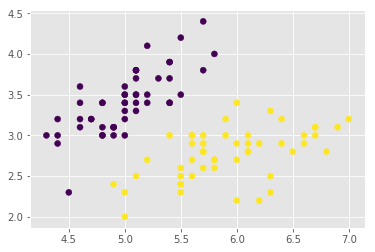

In [30]:
cl = HyrarhialClustering(n_clusters=2, linkage='single')
#%timeit 
cl.fit(x_iris)

#откровенно не нашел способ как ускорить этот алгоритм
plt.scatter(x_iris[:,0],x_iris[:,1],c=cl.labels_)

Видно, что классы разделяются, поэтому можно надеяться, что наш алгоритм "найдет" кластеры, соответствующие исходным классам. Результат работы реализованного алгоритма кластеризации предлагается сравнить с эталонной кластеризацией. Для этого предлагается изучить метрику ([adjusted rand score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)). В случае если значение этой метрики отличается от 1, предлагается поработать над улучшением реализации своего алгоритма.

In [12]:
pred_iris = HyrarhialClustering(n_clusters=2).fit_predict(x_iris)
print "Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris, pred_iris)

Adjusted Rand index for iris is: 1.00


Выбрать и реализовать критерий качества, на основании которого будут подбираться параметры модели. Варианты критериев:
- Инерция (сумма квадратов расстояний от каждой из точек до ближайшего к этой точке центроида)
- Средний диаметр (максимальное расстояние между точками в кластере) или радиус (расстояние от центроида до самой дальней от него точки в кластере)
- Sihouette

**Критерий качества необходимо выбрать таким образом, чтобы он подходил для реализованного алгоритма**

In [20]:
## Задание 2
def quality(x, y):
    """
    Dunn Index
    """
    minn = -1
    maxx = -1
    clusters = set(y)
    for clusterA in clusters:
        for clusterB in clusters:
            if clusterA == clusterB:
                continue
            dist = cd.cdist(x[y == clusterA], x[y == clusterB]).min()
            if minn == -1 or minn > dist:
                minn = dist
        diam = cd.cdist(x[y == clusterA], x[y == clusterA]).max()
        if maxx == -1 or maxx < diam:
            maxx = diam
    return minn / maxx

In [9]:
x = pd.read_csv('WDIData.csv')

In [10]:
x = x[['2011']].fillna(x[['2011']].mean())
x.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 61
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,1.938190e+11,1.887850e+11,1.879963e+11,1.889742e+11,1.988597e+11,2.021878e+11,...,1.471843e+12,1.534315e+12,1.713652e+12,2.005697e+12,2.181271e+12,2.513982e+12,2.666251e+12,3.113991e+12,5.020935e+12,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,1.938190e+11,1.887850e+11,1.879963e+11,1.889742e+11,1.988597e+11,2.021878e+11,...,1.471843e+12,1.534315e+12,1.713652e+12,2.005697e+12,2.181271e+12,2.513982e+12,2.666251e+12,3.113991e+12,5.020935e+12,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,1.938190e+11,1.887850e+11,1.879963e+11,1.889742e+11,1.988597e+11,2.021878e+11,...,8.283193e+01,8.347462e+01,8.400608e+01,8.441615e+01,8.473457e+01,8.500364e+01,8.524497e+01,3.113991e+12,5.020935e+12,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,1.938190e+11,1.887850e+11,1.879963e+11,1.889742e+11,1.988597e+11,2.021878e+11,...,8.504225e+01,8.465534e+01,8.595535e+01,8.639231e+01,8.684697e+01,8.760496e+01,8.803912e+01,3.113991e+12,5.020935e+12,NaN
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,1.938190e+11,1.887850e+11,1.879963e+11,1.889742e+11,1.988597e+11,2.021878e+11,...,7.229232e+01,7.176534e+01,7.373427e+01,7.450072e+01,7.521850e+01,7.671225e+01,7.740727e+01,3.113991e+12,5.020935e+12,NaN


In [147]:
#for (method, group) in x.groupby('Country Code'):
    #print group
#из всех данных нам надо собрать только нужные. опытным путем стало известно что всего 1553 показателя для каждой страны а до
#47 позиции всякая фигняи и первое именно гос-во начинается с афганистана
i = 47 * 1553
xx = x[['2011']][i:i + 1553].T.values
i += 1553
while i < len(x):
    xx = np.concatenate((xx, x[['2011']][i:i + 1553].T.values))
    i += 1553
print xx
countryNames = x[['Country Name']][47 * 1553::1553]
#print x[['2011']][::1553]

[[  2.00569714e+12   2.00569714e+12   1.85441375e+01 ...,   2.00569714e+12
    4.04000000e+01   2.86252302e+01]
 [  2.00569714e+12   2.00569714e+12   6.30942225e+01 ...,   2.00569714e+12
    2.00569714e+12   2.95076296e+01]
 [  2.00569714e+12   2.00569714e+12   9.99889093e+01 ...,   2.00569714e+12
    2.00569714e+12   4.44500996e+01]
 ..., 
 [  2.00569714e+12   2.00569714e+12   6.19973958e+01 ...,   2.00569714e+12
    2.00569714e+12   3.82790964e+01]
 [  2.00569714e+12   2.00569714e+12   1.54872656e+01 ...,   2.00569714e+12
    2.00569714e+12   5.66792637e+01]
 [  2.00569714e+12   2.00569714e+12   3.07094157e+01 ...,   1.69000000e+01
    3.05000000e+01   5.77501634e+01]]


Применим критерий для выбора параметров алгоритма. Предлагается изменить следующий код таким образом, чтобы кластеризация вызывалась с верным набором параметров. На графике можно будет увидеть зависимость критерия от параметров алгоритма. Необходимо выбрать оптимальные значения этих параметров.

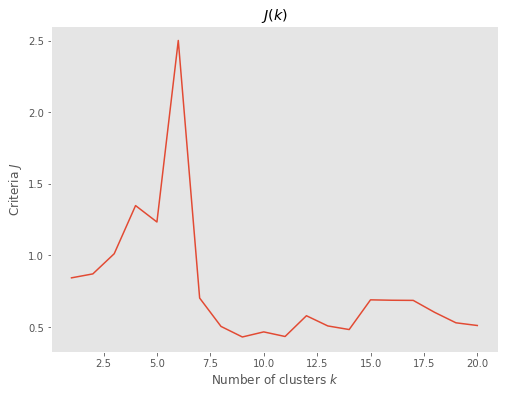

In [131]:
#посмотрим какая классификация лучшая на этих данных
ks = range(1, 21)
criteria = np.zeros(len(ks))

for i, k in enumerate(ks):
    cls = HyrarhialClustering(n_clusters=k + 1)
    y = cls.fit_predict(xx)
    criteria[i] = quality(xx, y)
    
pl.figure(figsize=(8, 6))
pl.plot(ks, criteria)
pl.title("$J(k)$")
pl.ylabel("Criteria $J$")
pl.xlabel("Number of clusters $k$")
pl.grid()
pl.show()

In [132]:
##6 дак 6
cls = HyrarhialClustering(6)
y = cls.fit_predict(xx)

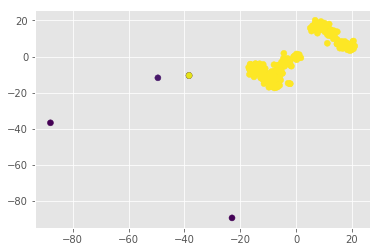

In [134]:
#применим TSNE и заметим что есть 4 шумовых объекта (ну и то что на таких данных какая то фигня. понятно почему: очень много nan,
#которые пришлось заполнить не особо значимыми данными)
from sklearn.manifold import TSNE
resizedXX = TSNE(n_components=2).fit_transform(xx)
plt.scatter(resizedXX[:,0],resizedXX[:,1],c=y)

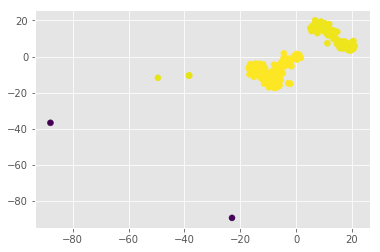

In [135]:
#давайте отсечем эти объекты кластеризовав данные на 5 кластеров и взяв объекты только из самого большого кластера(это 263)
cls = HyrarhialClustering(5)
y = cls.fit_predict(resizedXX)
plt.scatter(resizedXX[:,0],resizedXX[:,1],c=y)

In [143]:
print y

[216 216 216 213 213 216 213 216 216 213 213 213 216 213 213 216 213 216
 213 216 216 213 216 216 216 216 216 213 213 216 216 216 216 216 216 213
 213 216 216 213 216 216 211 216 216 216 216 216 213 213 213 213 213 213
 216 216 216 216 216 216 213 216 213 216 213 216 213 213 213 216 216 216
 213 216 213 213 213 216 213 216 216 216 216 216 216 213 216 213 216  89
  90 216 213 213 213 213 216 211 216 216 216 213 213 211 216 213 216 216
 213 216 216 216 213 213 213 213 213 216 216 216 216 216 216 213 213 216
 216 216 213 216 213 216 216 216 216 216 213 213 216 213 213 213 216 216
 216 213 213 213 216 213 216 216 216 216 216 213 213 213 213 216 216 216
 216 213 216 213 216 216 213 216 213 213 213 213 216 216 216 213 213 216
 213 216 213 216 216 213 216 213 213 216 216 216 216 213 216 216 213 216
 216 216 213 213 216 216 213 213 216 213 216 216 216 211 213 213 216 216
 216]


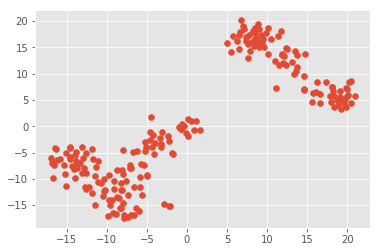

In [150]:
#вуаля нормальные данные
withoutNoizeX = resizedXX[(y == 216) + (y == 213)]
countryNames = countryNames[(y == 216) + (y == 213)]
plt.scatter(withoutNoizeX[:,0],withoutNoizeX[:,1])

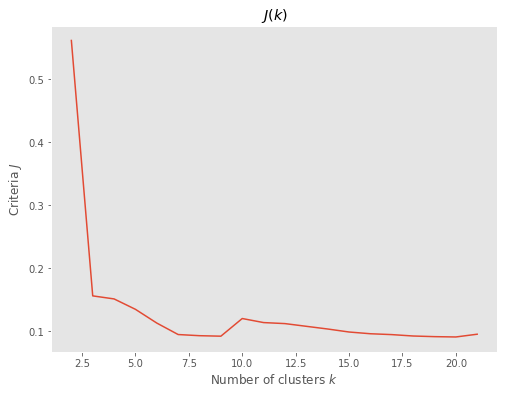

In [151]:
#ну давайте посмотрим нас сколько кластеров нам делить. визуально на 2 но что скажет критерий?
ks = range(2, 22)
criteria = np.zeros(len(ks))
for i, k in enumerate(ks):
    cls = HyrarhialClustering(n_clusters=k)
    y = cls.fit_predict(withoutNoizeX)
    criteria[i] = quality(withoutNoizeX, y)
    
pl.figure(figsize=(8, 6))
pl.plot(ks, criteria)
pl.title("$J(k)$")
pl.ylabel("Criteria $J$")
pl.xlabel("Number of clusters $k$")
pl.grid()
pl.show()

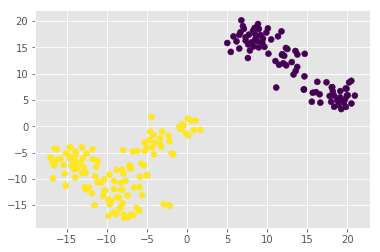

In [152]:
#ну да 2 кластера
cls = HyrarhialClustering(2)
y2 = cls.fit_predict(withoutNoizeX)
plt.scatter(withoutNoizeX[:,0],withoutNoizeX[:,1],c=y2)

In [153]:
y2

array([210, 210, 210, 207, 207, 210, 207, 210, 210, 207, 207, 207, 210,
       207, 207, 210, 207, 210, 207, 210, 210, 207, 210, 210, 210, 210,
       210, 207, 207, 210, 210, 210, 210, 210, 210, 207, 207, 210, 210,
       207, 210, 210, 210, 210, 210, 210, 210, 207, 207, 207, 207, 207,
       207, 210, 210, 210, 210, 210, 210, 207, 210, 207, 210, 207, 210,
       207, 207, 207, 210, 210, 210, 207, 210, 207, 207, 207, 210, 207,
       210, 210, 210, 210, 210, 210, 207, 210, 207, 210, 210, 207, 207,
       207, 207, 210, 210, 210, 210, 207, 207, 210, 207, 210, 210, 207,
       210, 210, 210, 207, 207, 207, 207, 207, 210, 210, 210, 210, 210,
       210, 207, 207, 210, 210, 210, 207, 210, 207, 210, 210, 210, 210,
       210, 207, 207, 210, 207, 207, 207, 210, 210, 210, 207, 207, 207,
       210, 207, 210, 210, 210, 210, 210, 207, 207, 207, 207, 210, 210,
       210, 210, 207, 210, 207, 210, 210, 207, 210, 207, 207, 207, 207,
       210, 210, 210, 207, 207, 210, 207, 210, 207, 210, 210, 20

In [157]:
#ну большенство евроепейских стран здесь
countryNames[y2 == 207]

,Country Name
77650,American Samoa
79203,Andorra
82309,Antigua and Barbuda
86968,Aruba
88521,Australia
90074,Austria
93180,"Bahamas, The"
94733,Bahrain
97839,Barbados
100945,Belgium


In [156]:
#здесь страны в целом менее развитые. единственное как то сша сюда попали
countryNames[y2 == 210]

,Country Name
72991,Afghanistan
74544,Albania
76097,Algeria
80756,Angola
83862,Argentina
85415,Armenia
91627,Azerbaijan
96286,Bangladesh
99392,Belarus
102498,Belize


Поздравляем, Вы завершили домашние задания по модулю "Алгоритмы кластеризации". Надеемся, что это было интересно.